In [12]:
import keras
from keras.layers import LSTM, Dense, Dropout, Embedding, SimpleRNN, GRU
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import numpy as np
import pylab as plt

# このSprintについて

## Sprintの目的
* 発展的なRNNの手法を理解する
* ドキュメントを網羅的に読む

## どのように学ぶか
* Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

# KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。


以下のドキュメントにまとめられています。

(https://keras.io/ja/layers/recurrent/)

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

* SimpleRNN
* GRU
* LSTM
* ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

ConvLSTM2Dのサンプルコード


[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)


このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

データ読み込み

In [2]:
max_features = 10000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


前処理（パディング）

In [3]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### SimpleRNN

In [7]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
callbacks = EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=0, mode='auto')
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print('Train...')

callbacks = [EarlyStopping(monitor="val_loss", min_delta=0, patience=0, verbose=0, mode="auto")]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test), callbacks=callbacks)


score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 44s 57ms/step - loss: 0.6855 - accuracy: 0.5426 - val_loss: 0.6343 - val_accuracy: 0.6055
Epoch 2/15
782/782 [==============================] - 47s 60ms/step - loss: 0.5197 - accuracy: 0.7375 - val_loss: 0.5166 - val_accuracy: 0.7784
Epoch 3/15
782/782 [==============================] - 49s 63ms/step - loss: 0.4039 - accuracy: 0.8222 - val_loss: 0.4468 - val_accuracy: 0.8046
Epoch 4/15
782/782 [==============================] - 7s 9ms/step - loss: 0.7491 - accuracy: 0.7518
Test score: 0.7491169571876526
Test accuracy: 0.7518399953842163


### GRU

In [8]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
callbacks = [EarlyStopping(monitor="val_loss", min_delta=0, patience=0, verbose=0, mode="auto")]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test), callbacks=callbacks)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 153s 195ms/step - loss: 0.4578 - accuracy: 0.7765 - val_loss: 0.3587 - val_accuracy: 0.8432
Epoch 2/15
782/782 [==============================] - 156s 199ms/step - loss: 0.2741 - accuracy: 0.8858 - val_loss: 0.3428 - val_accuracy: 0.8504
Epoch 3/15
782/782 [==============================] - 18s 23ms/step - loss: 0.3719 - accuracy: 0.8397
Test score: 0.3718737065792084
Test accuracy: 0.8397200107574463


### LSTM

In [9]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
callbacks = [EarlyStopping(monitor="val_loss", min_delta=0, patience=0, verbose=0, mode="auto")]
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test), callbacks=callbacks)
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Epoch 1/15
782/782 [==============================] - 180s 231ms/step - loss: 0.4390 - accuracy: 0.7896 - val_loss: 0.3787 - val_accuracy: 0.8323
Epoch 2/15
782/782 [==============================] - 179s 228ms/step - loss: 0.2879 - accuracy: 0.8820 - val_loss: 0.3634 - val_accuracy: 0.8372
Epoch 3/15
782/782 [==============================] - 23s 29ms/step - loss: 0.4390 - accuracy: 0.8328
Test score: 0.4389919638633728
Test accuracy: 0.8327999711036682


### ConvLSTM2D

Epoch 1/15
95/95 [==============================] - 2350s 25s/step - loss: 0.7894 - val_loss: 0.7227
Epoch 2/15
95/95 [==============================] - 2374s 25s/step - loss: 0.7389 - val_loss: 0.7771


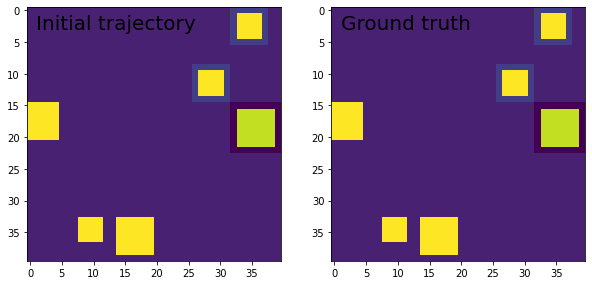

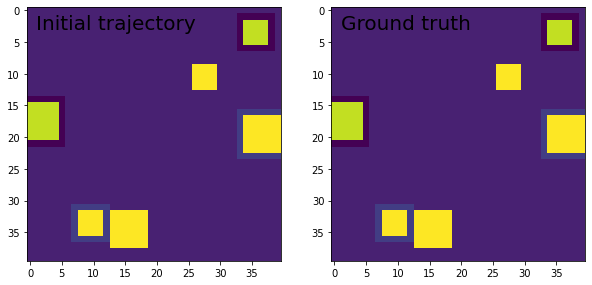

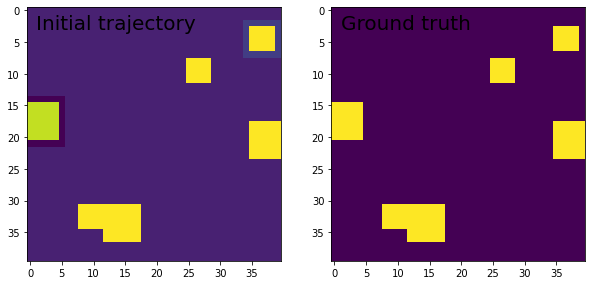

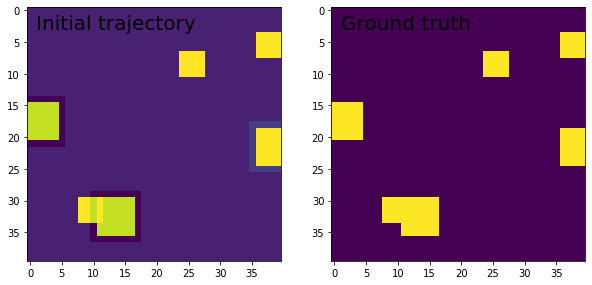

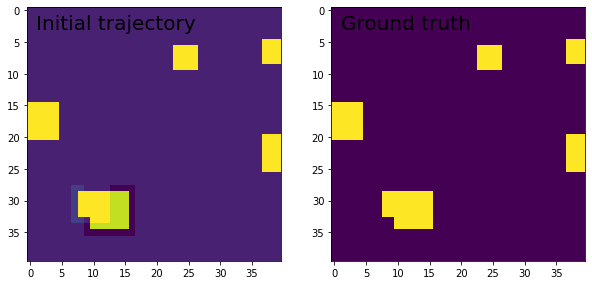

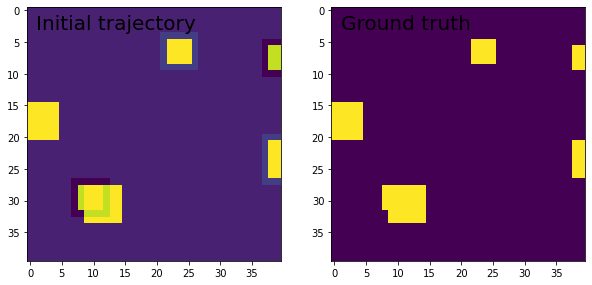

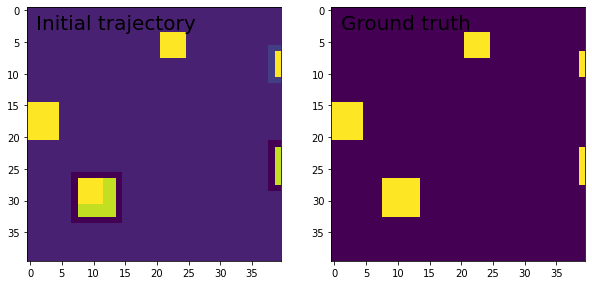

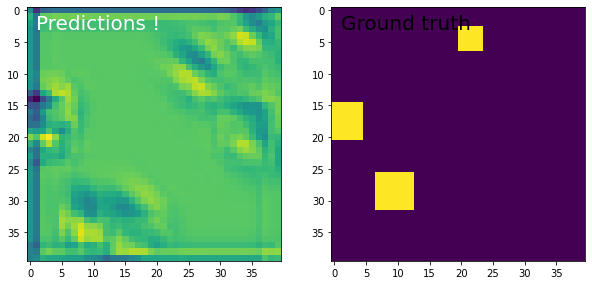

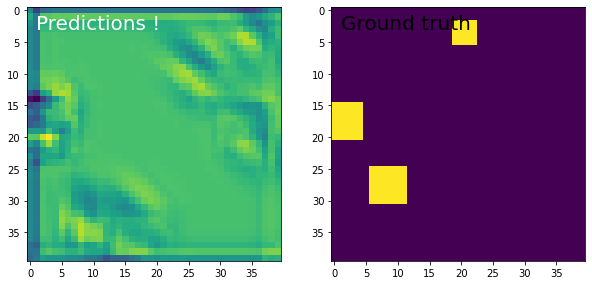

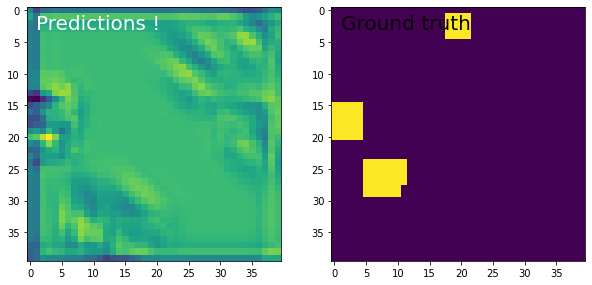

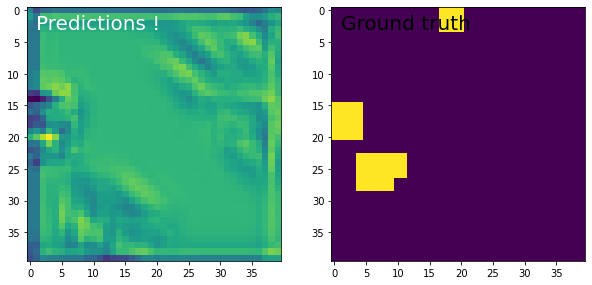

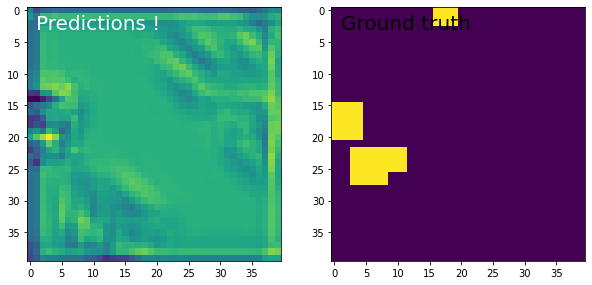

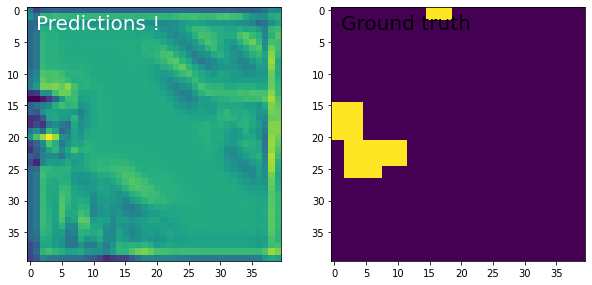

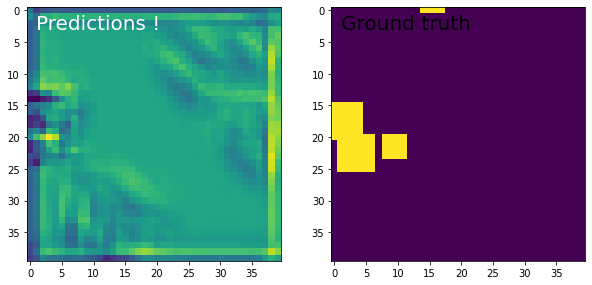

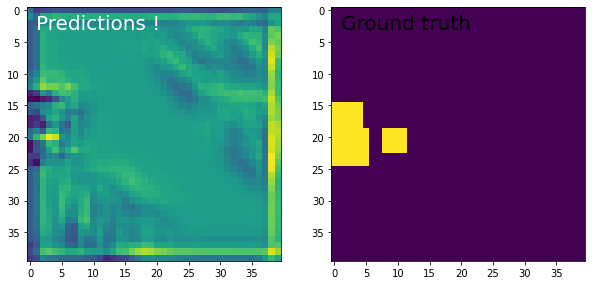

In [13]:

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
callbacks = [EarlyStopping(monitor="val_loss", min_delta=0, patience=0, verbose=0, mode="auto")]
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10, callbacks=callbacks,
        epochs=15, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。



## 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

* RNN
* SimpleRNNCell
* GRUCell
* LSTMCell
* StackedRNNCells
* CuDNNGRU
* CuDNNLSTM

* RNN
  * 系列データを学習することができるニューラルネットワーク。勾配消失問題と重み衝突という二つの理由により長期的な特徴の学習は苦手。
  * 系列データを入力にとり、現在の系列の入力に加えて前の系列の「状態」も使って出力を決めるネットワーク
  * 出力が今の時刻の入力と前の時刻の状態に依存する
```python
    SimpleRNN(1, activation=None, input_shape=(None, 1), return_sequences=True)
```


* SimpleRNNCell
  * 入力シーケンスのバッチ全体を処理するRNNレイヤーとは異なり、RNNセルは単一のタイムステップのみを処理します。
  セルは、RNN層のforループの内側にあります。
  ```python
  RNN(SimpleRNNCell(1, activation=None), input_shape=(None, 1), return_sequences=True)
  ```

  * SimpleRNNに相当するサンプル単位の処理を自分で定義してRNNで囲むことにより、好きな構造のRNNを定義することができる

* GRUCell
  * LSTMの代替となるモデルでLSTMより計算量が少なくてすむ。性能はLSTMと変わらないとされている。
  ```python
  keras.layers.GRUCell(units, activation='tanh', 
                      recurrent_activation='hard_sigmoid', use_bias=True, 
                      kernel_initializer='glorot_uniform', 
                      recurrent_initializer='orthogonal', 
                      bias_initializer='zeros', kernel_regularizer=None, 
                      recurrent_regularizer=None, bias_regularizer=None, 
                      kernel_constraint=None, recurrent_constraint=None, 
                      bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                      implementation=1)
  ```
* LSTMCell
  * 長期的特徴と短期的特徴を学習することができる。欠点は計算量が多いこと。
* StackedRNNCells
  * RNN cellのスタックの振る舞いを単一のCellのようにするためのラッパー。効率的なstacked RNNを実装するために使われます．
  ```python
  keras.layers.StackedRNNCells(cells)
  ```
* CuDNNGRU
  * CuDNNを利用した高速なGRU実装．TensorFlowバックエンドでGPU上でのみ動作します．
```python
  keras.layers.CuDNNGRU(units, 
                      kernel_initializer='glorot_uniform', 
                      recurrent_initializer='orthogonal', 
                      bias_initializer='zeros', kernel_regularizer=None, 
                      recurrent_regularizer=None, bias_regularizer=None, 
                      activity_regularizer=None, kernel_constraint=None, 
                      recurrent_constraint=None, bias_constraint=None, 
                      return_sequences=False, return_state=False, stateful=False)

```
* CuDNNLSTM
  * CuDNNを利用した高速なLSTM実装．TensorFlowバックエンドでGPU上でのみ動作します．

```python
 keras.layers.CuDNNLSTM(units, 
                      kernel_initializer='glorot_uniform', 
                      recurrent_initializer='orthogonal', 
                      bias_initializer='zeros', unit_forget_bias=True, 
                      kernel_regularizer=None, recurrent_regularizer=None, 
                      bias_regularizer=None, activity_regularizer=None, 
                      kernel_constraint=None, recurrent_constraint=None, 
                      bias_constraint=None, return_sequences=False, 
                      return_state=False, stateful=False)
```
                    